In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics
import json 
import os
import glob

In [6]:
def savefigDF(ax, file_name):
    fig = ax.get_figure()
    fig.savefig(f'{file_name}.pdf', bbox_inches='tight')
    fig.savefig(f'{file_name}.svg', bbox_inches='tight')

In [12]:
def plotLossColumns(directory):
    results = list()
    for path in glob.glob(directory):
        future_days = path[-7:-5]
        if future_days[0] == '_':
            future_days = int(future_days[1])
        else:
            future_days = int(future_days)
            if future_days not in [12, 24, 36, 48, 60]:
                continue
        with open(path) as json_file:
            data = json.load(json_file)
            results.append([future_days, data['mae'], data['rmse'], data['mape']])
    results.sort(key=lambda x: x[0])
    results = pd.DataFrame(results, columns = ['Number of days in future', 'mae', 'rmse', 'mape'])
    ax = results.plot(x="Number of days in future", y=["mae", "rmse", "mape"], kind="bar", rot=0,
                     ylabel = 'loss')
    return ax

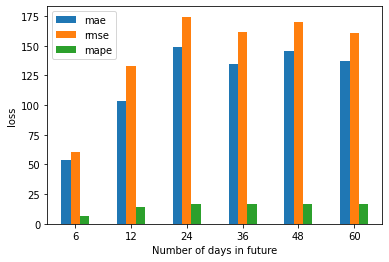

In [14]:
axVAR = plotLossColumns("../Results/VAR/*metrics*.json")
folder_save = f'..\Pics\VAR'
isExist = os.path.exists(folder_save)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(folder_save)
   print("The new directory is created!")
savefigDF(axVAR, f'{folder_save}\loss_compared_num_futures_2')

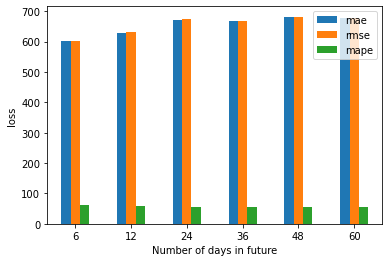

In [15]:
axFbProphet = plotLossColumns("../Results/FbProphet/*metrics_test*.json")
folder_save = f'..\Pics\FbProphet'
isExist = os.path.exists(folder_save)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(folder_save)
   print("The new directory is created!")
savefigDF(axFbProphet, f'{folder_save}\loss_compared_num_futures_2')

In [19]:
def plotLSTMline(typeLSTMs, loss_type):
    # typeLSTMs = ['Stacked_LSTM', 'biLSTM', 'Encoder_Decoder_LSTM', 'Attention_LSTM', 'GRU']
    df = dict()
    range_days = [*range(12, 61, 6)]
    for typeLSTM in typeLSTMs:
        df[typeLSTM] = list()
        for num_future_day in range_days:
            with open(f"../Results/{typeLSTM}/history_{num_future_day}_future_24_version_1/metrics_test.json"
                     ) as json_file:
                data = json.load(json_file)
            df[typeLSTM].append(data[loss_type])
    df = pd.DataFrame(df, index = range_days)
    ax = df.plot.line(xlabel = 'Number of days in past', ylabel = 'loss')
    ax.set_xticks(range_days)
    return ax
# ax = plotLSTMline(['Stacked_LSTM', 'biLSTM', 'Encoder_Decoder_LSTM', 'Attention_LSTM', 'GRU'], 'mae')
# ax = plotLSTMline(['Stacked_LSTM', 'biLSTM', 'Encoder_Decoder_LSTM', 'Attention_LSTM', 'GRU'], 'rmse')
# ax = plotLSTMline(['Stacked_LSTM', 'biLSTM', 'Encoder_Decoder_LSTM', 'Attention_LSTM', 'GRU'], 'mape')

<AxesSubplot: xlabel='Number of days in past', ylabel='loss'>

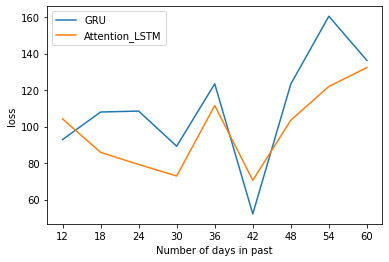

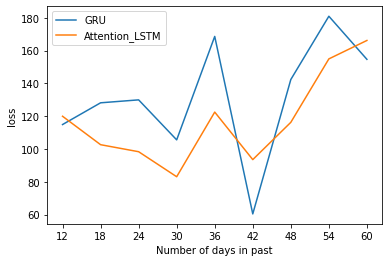

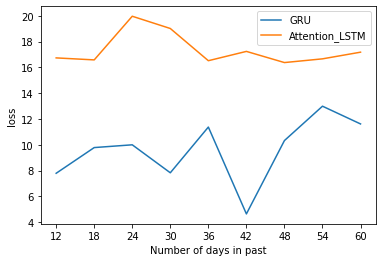

In [20]:
models = ['GRU', 'Attention_LSTM']
plotLSTMline(models, 'mae')
plotLSTMline(models, 'rmse')
plotLSTMline(models, 'mape')

In [30]:
!dir

 Volume in drive D is New Volume
 Volume Serial Number is E82A-B3D2

 Directory of D:\Class_modules\Deep_Learning\Deep_Learning_HUST_Project\Code

02/05/2023  08:49 PM    <DIR>          .
02/05/2023  08:49 PM    <DIR>          ..
02/02/2023  11:19 AM    <DIR>          .ipynb_checkpoints
02/02/2023  11:13 AM         1,811,224 Analysis.ipynb
02/05/2023  07:55 PM            41,902 Attention_LSTM.ipynb
02/02/2023  11:13 AM            89,116 biLSTM.ipynb
01/25/2023  12:49 PM            45,550 Encoder_Decoder_LSTM.ipynb
01/31/2023  02:13 PM            21,371 FbProphet.ipynb
01/31/2023  11:16 PM            82,299 GRU.ipynb
02/05/2023  08:49 PM            30,092 Result_visualization.ipynb
02/02/2023  11:13 AM            22,005 SLSTM.ipynb
02/05/2023  07:53 PM           104,635 Stacked_LSTM.ipynb
01/17/2023  06:00 PM           616,819 test.csv
12/08/2022  09:02 AM            11,820 test.ipynb
01/20/2023  01:05 AM           377,416 test_LSTM.ipynb
02/05/2023  07:51 PM           907,447 VAR.ipynb